In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import fisher_exact
from scipy import stats
import seaborn as sns

import matplotlib.font_manager as font_manager
import pandas as pd
font_dirs = ['/mnt/e/Misc/Python_Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'

In [2]:
stemdiff_table = pd.read_csv('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Accepted_in_Principle_v2/SourceDataSuppFig1.tsv',
                             sep='\t')

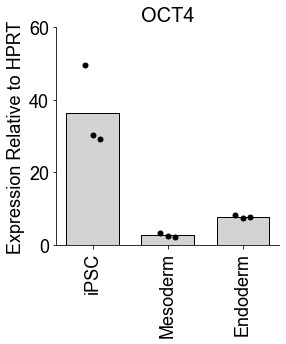

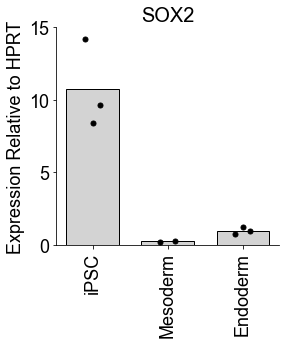

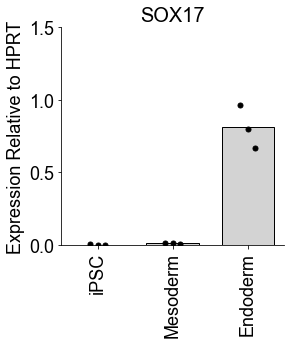

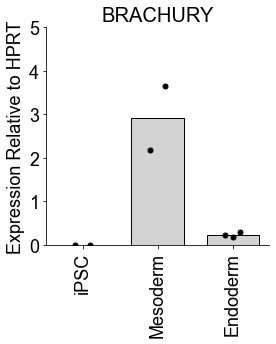

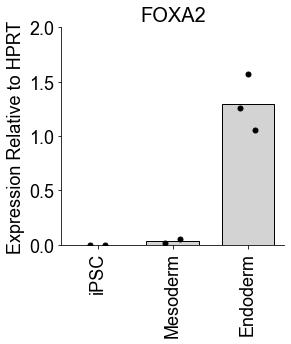

In [3]:
ytick_dict = {'OCT4':[0,20,40,60],'SOX2':[0,5,10,15],'SOX17':[0,0.5,1,1.5],'BRACHURY':[0,1,2,3,4,5],'FOXA2':[0,0.5,1,1.5,2]}
for gene in ['OCT4','SOX2','SOX17','BRACHURY','FOXA2']:
    plt.figure(figsize=(4,4))
    ax = plt.subplot(111)
    ipsc_vals = stemdiff_table[(stemdiff_table['gene']==gene) & (stemdiff_table['Differentiation']=='iPSC')]['qPCR Expression relative to HPRT']
    meso_vals = stemdiff_table[(stemdiff_table['gene']==gene) & (stemdiff_table['Differentiation']=='Mesoderm')]['qPCR Expression relative to HPRT']
    endo_vals = stemdiff_table[(stemdiff_table['gene']==gene) & (stemdiff_table['Differentiation']=='Endoderm')]['qPCR Expression relative to HPRT']
    for j,vals in enumerate([ipsc_vals,meso_vals,endo_vals]):
        plt.bar(j,np.mean(vals),color='lightgray',edgecolor='black',width=0.7)
        if len(vals) == 2:
            diffs = [-0.1,0.1]
        else:
            diffs = [-0.1,0,0.1]
        plt.plot([j + diffs[x] for x in range(len(vals))],vals,'.',color='black',markersize=10)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks(ytick_dict[gene],fontsize=18)
    plt.xticks([0,1,2],['iPSC','Mesoderm','Endoderm'],fontsize=18,rotation=90)
    plt.ylabel('Expression Relative to HPRT',fontsize=18)
    plt.title(gene,fontsize=20)
    plt.savefig('figures/suppinfo/'+gene+'.png',dpi=500,bbox_inches='tight')